Columns in the dataframe:
Index(['daily_revenue'], dtype='object')
First 5 rows of the dataframe:
            daily_revenue
date                     
2014-12-30        324.044
2015-01-06       4599.572
2015-01-13       4509.127
2015-01-20       3811.200
2015-01-27       1642.310
Plotting the raw data...


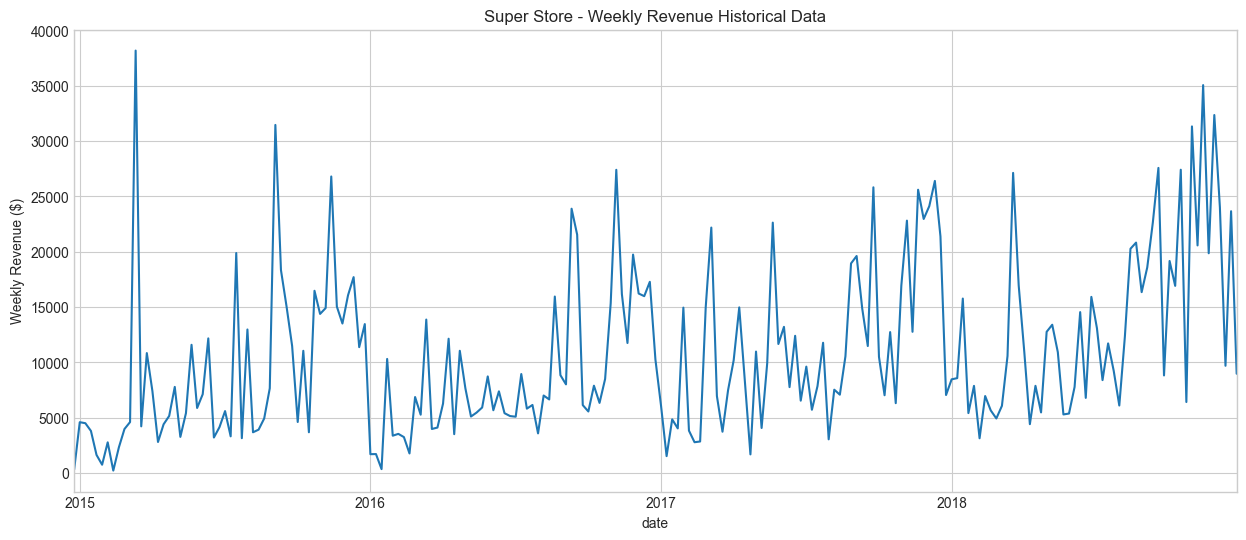

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Import our custom modules
from src.data_generator import generate_sales_data
from src.feature_engineering import create_features
from src.model_trainer import train_linear_regression, train_random_forest, train_final_model, save_model
from src.evaluation import evaluate_model, perform_time_series_cv, plot_predictions
from src.business_value import calculate_business_value_by_week

# Define file paths session_1_sales_forecasting\implement\data\super_store_sales\sales_by_order_date.csv
DATA_DIR = 'data/super_store_sales'
MODEL_DIR = 'models'
DATA_FILE = os.path.join(DATA_DIR, 'sales_by_order_date_w.csv')
MODEL_FILE = os.path.join(MODEL_DIR, 'super_store_forecaster_w.pkl')

# Generate and load data
# generate_sales_data(DATA_FILE)
df = pd.read_csv(DATA_FILE, parse_dates=['date'])
df.set_index('date', inplace=True)
print('Columns in the dataframe:')
print(df.columns)
print('First 5 rows of the dataframe:')
print(df.head())

# Plot the raw data
print('Plotting the raw data...')
plt.style.use('seaborn-v0_8-whitegrid')
df['daily_revenue'].plot(figsize=(15, 6), title="Super Store - Weekly Revenue Historical Data")
plt.ylabel('Weekly Revenue ($)')
plt.show()


In [2]:
featured_df = create_features(df.reset_index())
print("Columns in our new dataset:")
print(featured_df.columns)
print("\nFirst 5 rows of the new data:")
print(featured_df.head())

# Save the featured dataframe to a csv file
FEATURED_DATA_FILE = os.path.join(DATA_DIR, 'super_store_sales_featured.csv')
featured_df.to_csv(FEATURED_DATA_FILE, index=False)
print(f"\nFeatured data saved to {FEATURED_DATA_FILE}")


Columns in our new dataset:
Index(['daily_revenue', 'day_of_week', 'month', 'year', 'quarter',
       'day_of_year', 'day_of_week_sin', 'day_of_week_cos', 'month_sin',
       'month_cos', 'lag_1', 'lag_7', 'lag_30', 'rolling_mean_7',
       'rolling_mean_30'],
      dtype='object')

First 5 rows of the new data:
            daily_revenue  day_of_week  month  year  quarter  day_of_year  \
date                                                                        
2015-07-28      3153.5940            1      7  2015        3          209   
2015-08-04     12976.0820            1      8  2015        3          216   
2015-08-11      3688.2840            1      8  2015        3          223   
2015-08-18      3925.8960            1      8  2015        3          230   
2015-08-25      4934.6725            1      8  2015        3          237   

            day_of_week_sin  day_of_week_cos  month_sin  month_cos      lag_1  \
date                                                             

Training Linear Regression model...
Training complete.
Model Evaluation Results:
Mean Absolute Error (MAE): $6315.92
Root Mean Squared Error (RMSE): $8173.66
------------------------------
Interpretation:
On average, the model's predictions are off by about $6315.92.
RMSE is higher because it penalizes larger errors more heavily.


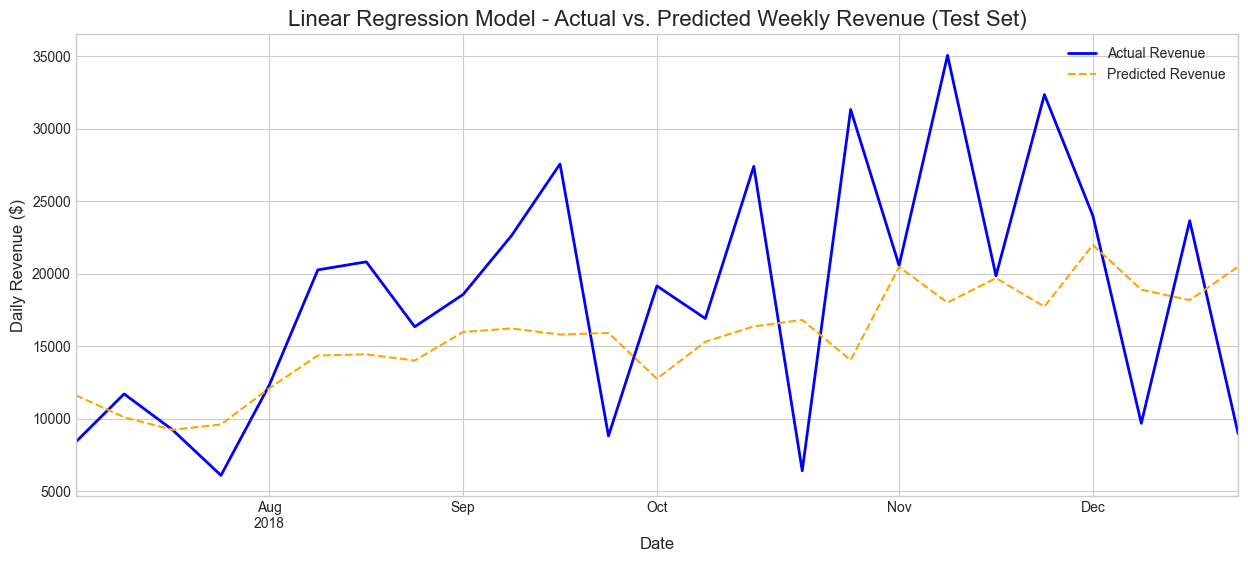

Linear Regression predictions saved to data/super_store_sales\linear_regression_predictions.csv


In [3]:
# lr_model, X_test_lr, y_test_lr = train_linear_regression(featured_df)
lr_model, X_test_lr, y_test_lr = train_linear_regression(featured_df, test_size=25)
lr_results = evaluate_model(lr_model, X_test_lr, y_test_lr)
plot_predictions(lr_results, title="Linear Regression Model - Actual vs. Predicted Weekly Revenue (Test Set)")

# Save Linear Regression results
LR_RESULTS_FILE = os.path.join(DATA_DIR, 'linear_regression_predictions.csv')
lr_results.to_csv(LR_RESULTS_FILE, index=True)
print(f"Linear Regression predictions saved to {LR_RESULTS_FILE}")


Training Random Forest with data shape: (154, 14)
Model training completed.
Model Evaluation Results:
Mean Absolute Error (MAE): $7175.68
Root Mean Squared Error (RMSE): $8394.87
------------------------------
Interpretation:
On average, the model's predictions are off by about $7175.68.
RMSE is higher because it penalizes larger errors more heavily.


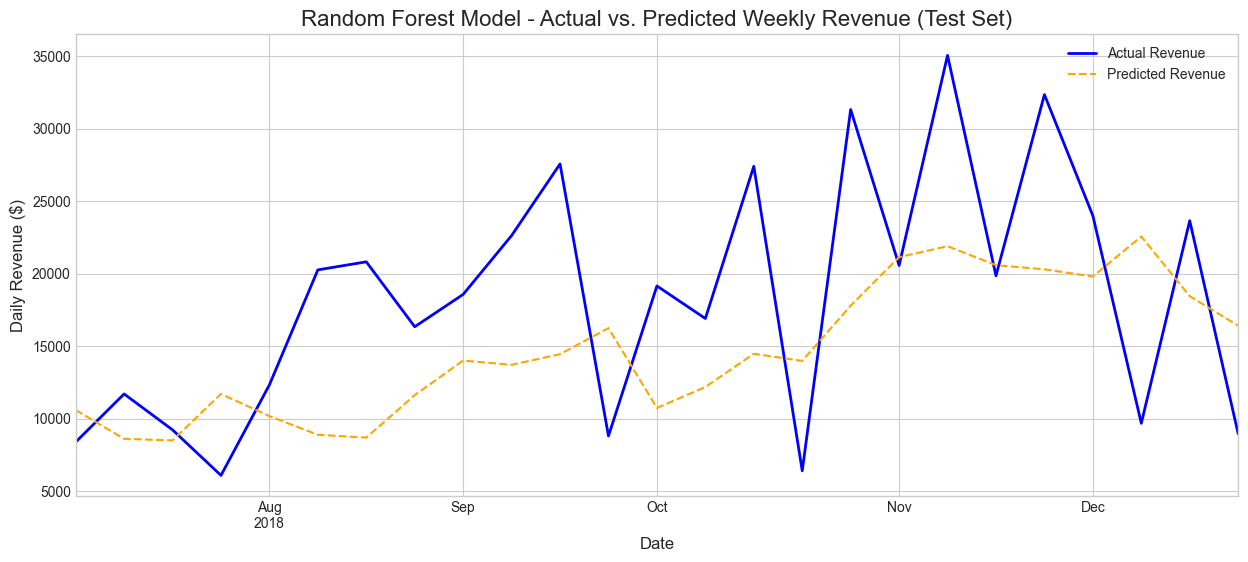

Random Forest predictions saved to data/super_store_sales\random_forest_predictions.csv


In [4]:
# rf_model, X_test_rf, y_test_rf = train_random_forest(featured_df)
rf_model, X_test_rf, y_test_rf = train_random_forest(featured_df, test_size=25)
rf_results = evaluate_model(rf_model, X_test_rf, y_test_rf)
plot_predictions(rf_results, title="Random Forest Model - Actual vs. Predicted Weekly Revenue (Test Set)")

# Save Random Forest results
RF_RESULTS_FILE = os.path.join(DATA_DIR, 'random_forest_predictions.csv')
rf_results.to_csv(RF_RESULTS_FILE, index=True)
print(f"Random Forest predictions saved to {RF_RESULTS_FILE}")


In [5]:
print("--- Running CV for Linear Regression ---")
lr_cv_model = LinearRegression()
lr_cv_results = perform_time_series_cv(lr_cv_model, featured_df)

# Save Linear Regression CV results
LR_CV_RESULTS_FILE = os.path.join(DATA_DIR, 'linear_regression_cv_predictions.csv')
# lr_cv_results.to_csv(LR_CV_RESULTS_FILE, index=True)
print(f"Linear Regression CV predictions saved to {LR_CV_RESULTS_FILE}")


--- Running CV for Linear Regression ---
Performing Time Series Cross-Validation with 5 splits...
------------------------------------------------------------
Fold 1/5 | Train: 34 | Test: 29 | MAE: $12020.16 | RMSE: $14471.13
Fold 2/5 | Train: 63 | Test: 29 | MAE: $5218.67 | RMSE: $6272.84
Fold 3/5 | Train: 92 | Test: 29 | MAE: $4745.72 | RMSE: $6070.60
Fold 4/5 | Train: 121 | Test: 29 | MAE: $5093.28 | RMSE: $6040.33
Fold 5/5 | Train: 150 | Test: 29 | MAE: $5885.81 | RMSE: $7750.69
------------------------------------------------------------
Average CV MAE: $6592.73
Average CV RMSE: $8121.12
Linear Regression CV predictions saved to data/super_store_sales\linear_regression_cv_predictions.csv


In [6]:
print("\n--- Running CV for Random Forest ---")
rf_cv_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10)
rf_cv_results = perform_time_series_cv(rf_cv_model, featured_df)

# Save Random Forest CV results
RF_CV_RESULTS_FILE = os.path.join(DATA_DIR, 'random_forest_cv_predictions.csv')
# rf_cv_results.to_csv(RF_CV_RESULTS_FILE, index=True)
print(f"Random Forest CV predictions saved to {RF_CV_RESULTS_FILE}")



--- Running CV for Random Forest ---
Performing Time Series Cross-Validation with 5 splits...
------------------------------------------------------------
Fold 1/5 | Train: 34 | Test: 29 | MAE: $2442.25 | RMSE: $3921.52
Fold 2/5 | Train: 63 | Test: 29 | MAE: $4068.10 | RMSE: $5629.12
Fold 3/5 | Train: 92 | Test: 29 | MAE: $4023.62 | RMSE: $5796.13
Fold 4/5 | Train: 121 | Test: 29 | MAE: $5216.09 | RMSE: $6738.56
Fold 5/5 | Train: 150 | Test: 29 | MAE: $6576.80 | RMSE: $7734.14
------------------------------------------------------------
Average CV MAE: $4465.37
Average CV RMSE: $5963.89
Random Forest CV predictions saved to data/super_store_sales\random_forest_cv_predictions.csv


In [7]:
final_model = train_final_model(featured_df, model_type='rf')  # model_type can be 'rf' (Random Forest) or 'lr' (Linear Regression)
save_model(final_model, MODEL_FILE)


Training final RF model on entire dataset (shape: (179, 14))...
Final model training completed.
Model saved successfully to models\super_store_forecaster_w.pkl


In [8]:
# Add 'error' column for weekly business value calculation
rf_cv_results['error'] = rf_cv_results['actual_revenue'] - rf_cv_results['predicted_revenue']
calculate_business_value_by_week(rf_cv_results)


Weekly Business Value Analysis (Estimated)
--------------------------------------------------
Assumptions:
  - Cost of weekly overstocking (excess staff/inventory): 12.0% of over-predicted revenue
  - Cost of weekly understocking (missed sales/emergency): 20.0% of under-predicted revenue
  - 'Without AI' weekly planning has 10.0% higher error rate
--------------------------------------------------
Average Weekly Cost of Prediction Errors with AI Model: $799.16
Estimated Weekly Cost of Errors without AI Model: $879.07
--------------------------------------------------
Estimated Weekly Savings with AI Forecasting: $79.92
Estimated Annual Savings with AI Forecasting: $4,155.62
--------------------------------------------------

Weekly Planning Benefits:
• Better staff scheduling reduces overtime and underutilization costs
• Improved inventory planning minimizes waste and stockouts
• Data-driven weekly promotions optimize revenue and customer satisfaction
• Reduced emergency restocking and

In [9]:
# Import the predictor module
from src.predictor import load_model, predict_future_weekly_sales, plot_predictions_with_history, summarize_predictions

# Load the saved model
loaded_model = load_model(MODEL_FILE)

# Use the original DataFrame with date column for prediction
df_for_prediction = df.reset_index()

# Predict the next 10 weeks using the proper weekly function
print("🔮 Generating 10-week revenue forecast for Super Store...")
future_predictions = predict_future_weekly_sales(loaded_model, df_for_prediction, weeks_ahead=10)

print(f"\n✅ Successfully generated predictions for {len(future_predictions)} weeks!")
print("\nAll 10 week predictions:")
print(future_predictions.to_string(index=False))


Model loaded successfully from models\super_store_forecaster_w.pkl


🔮 Generating 10-week revenue forecast for Super Store...

✅ Successfully generated predictions for 10 weeks!

All 10 week predictions:
      date  predicted_revenue
2019-01-01       11121.561929
2019-01-08       26425.424219
2019-01-15       20766.993904
2019-01-22       29287.017867
2019-01-29       19634.618110
2019-02-05       27221.160667
2019-02-12       22351.951722
2019-02-19       13845.604743
2019-02-26       21302.144025
2019-03-05       11443.489971


d:\LAM\01 PROJECTS\Sharing Sessions\session_1_sales_forecasting\implement\src\predictor.py:130: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_featured = future_featured.fillna(method='ffill')


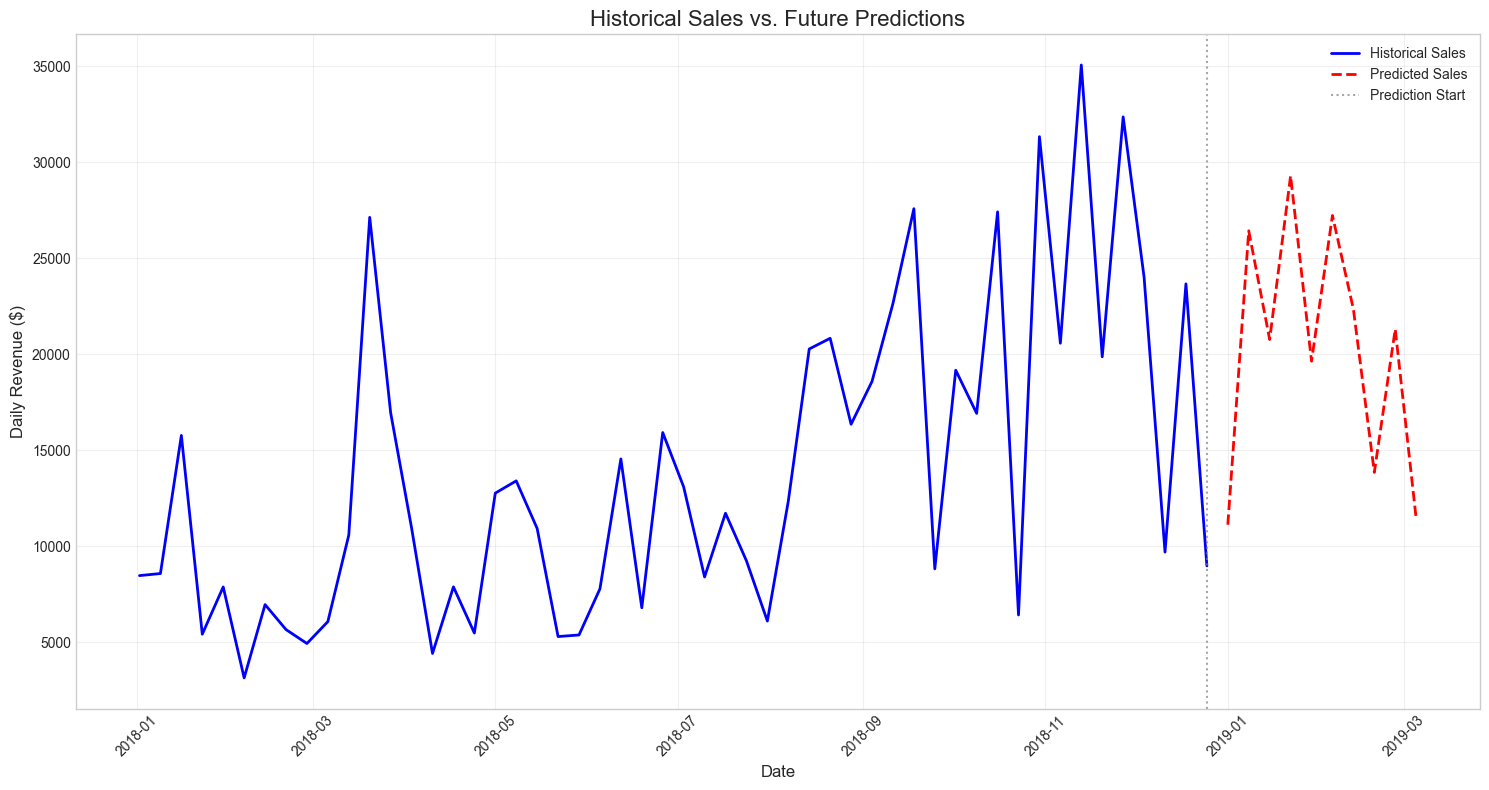

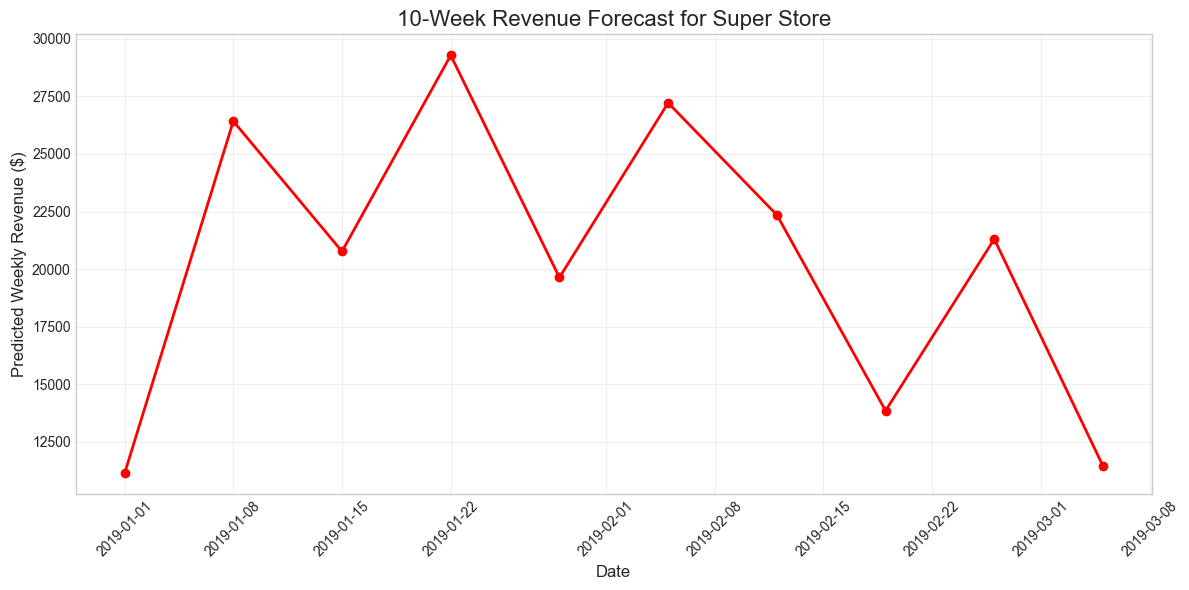

In [10]:
# Create a comprehensive plot showing historical data and future predictions
plot_predictions_with_history(df_for_prediction, future_predictions, days_to_show=52)

# Also create a zoomed-in view of just the prediction period
plt.figure(figsize=(12, 6))
plt.plot(future_predictions['date'], future_predictions['predicted_revenue'], 
         marker='o', color='red', linewidth=2, markersize=6)
plt.title("10-Week Revenue Forecast for Super Store", fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Predicted Weekly Revenue ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
# Generate a comprehensive summary of the predictions
summarize_predictions(future_predictions)

# Save the predictions for business use
FUTURE_PREDICTIONS_FILE = os.path.join(DATA_DIR, 'super_store_10_week_forecast.csv')
future_predictions.to_csv(FUTURE_PREDICTIONS_FILE, index=False)
print(f"\n💾 10-week forecast saved to: {FUTURE_PREDICTIONS_FILE}")

# Create additional business-relevant analysis
print("\n" + "="*60)
print("🎯 ACTIONABLE BUSINESS INSIGHTS")
print("="*60)

# Find peak and low revenue weeks
max_week = future_predictions.loc[future_predictions['predicted_revenue'].idxmax()]
min_week = future_predictions.loc[future_predictions['predicted_revenue'].idxmin()]

print(f"\n📈 Peak Revenue Week:")
print(f"  • Date: {max_week['date'].strftime('%B %d, %Y')}")
print(f"  • Predicted Revenue: ${max_week['predicted_revenue']:.2f}")

print(f"\n📉 Lowest Revenue Week:")
print(f"  • Date: {min_week['date'].strftime('%B %d, %Y')}")
print(f"  • Predicted Revenue: ${min_week['predicted_revenue']:.2f}")

# Calculate revenue variance for business planning
revenue_std = future_predictions['predicted_revenue'].std()
revenue_mean = future_predictions['predicted_revenue'].mean()
cv = (revenue_std / revenue_mean) * 100

print(f"\n📊 Variability Insights:")
print(f"  • Revenue Standard Deviation: ${revenue_std:.2f}")
print(f"  • Coefficient of Variation: {cv:.1f}%")

if cv < 10:
    print("  → Low variability: Stable weekly planning possible")
elif cv < 20:
    print("  → Moderate variability: Plan for some weekly fluctuation")
else:
    print("  → High variability: Consider flexible weekly strategies")


🔮 Future Sales Forecast Summary
Prediction Period: 2019-01-01 to 2019-03-05
Number of Days: 10

📊 Revenue Predictions:
  • Average Daily Revenue: $20340.00
  • Minimum Daily Revenue: $11121.56
  • Maximum Daily Revenue: $29287.02
  • Total Predicted Revenue: $203399.97

📈 Weekly Breakdown:
  • Week 1: Avg $11121.56/day, Total $11121.56
  • Week 2: Avg $26425.42/day, Total $26425.42
  • Week 3: Avg $20766.99/day, Total $20766.99
  • Week 4: Avg $29287.02/day, Total $29287.02
  • Week 5: Avg $19634.62/day, Total $19634.62
  • Week 6: Avg $27221.16/day, Total $27221.16
  • Week 7: Avg $22351.95/day, Total $22351.95
  • Week 8: Avg $13845.60/day, Total $13845.60
  • Week 9: Avg $21302.14/day, Total $21302.14
  • Week 10: Avg $11443.49/day, Total $11443.49

💾 10-week forecast saved to: data/super_store_sales\super_store_10_week_forecast.csv

🎯 ACTIONABLE BUSINESS INSIGHTS

📈 Peak Revenue Week:
  • Date: January 22, 2019
  • Predicted Revenue: $29287.02

📉 Lowest Revenue Week:
  • Date: Janu